<a href="https://colab.research.google.com/github/yohei-kobayashi-SK/predict-ADL/blob/main/predict_ADL_Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import xgboost as xgb
from xgboost import XGBClassifier

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
import warnings
warnings.simplefilter('ignore',DeprecationWarning)

In [16]:
# **.csv 学習データ、テストデータを読み取り
dataset = pd.read_csv("**train.csv")
dataset2 = pd.read_csv("**test.csv")

In [17]:
dataset

,year,"sex1:male,0:female",before mRS,damage side:right1 left0,disease_infarction_hemorrhage,Period_of_ impaired consciousness,ALB,medical_history(stroke),complications,start_date_of_mobilization,...,eat,trance,glooming,toilet,both,stairs,cloth,defecation,urination,target
0,50,1,0,1,0,1,4.0,0,0,2,...,10,10,0,5,0,0,10,10,10,1
1,74,1,0,1,1,3,3.6,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,64,0,0,0,1,0,4.2,0,0,4,...,10,10,0,5,0,0,5,0,0,1
3,78,0,0,0,1,2,3.7,0,0,2,...,0,10,0,5,0,0,0,0,0,1
4,79,1,0,0,1,0,3.5,0,0,2,...,0,5,0,0,0,0,0,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,79,0,0,0,0,5,3.9,0,0,6,...,10,5,0,5,0,5,5,0,5,1
193,76,0,1,1,0,2,4.0,0,0,4,...,0,0,0,0,0,0,0,0,0,1
194,62,1,0,1,0,1,4.1,0,0,6,...,10,10,5,5,0,5,5,5,5,1
195,83,0,0,0,0,1,3.7,0,0,10,...,10,10,5,5,0,0,5,10,10,1


In [18]:
type(dataset)

pandas.core.frame.DataFrame

In [19]:
print(dataset.columns)

Index(['year', 'sex1:male,0:female', 'before mRS', 'damage side:right1 left0',
       'disease_infarction_hemorrhage ', 'Period_of_ impaired consciousness',
       'ALB', 'medical_history(stroke)', 'complications',
       'start_date_of_mobilization', 'con level', 'con_question',
       'con_obedience', 'gaze', 'field_of_view', 'facial_paralysis',
       'no_para_upper', 'no_para_low', 'ataxia', 'sensory', 'language',
       'articulation', 'neglect', 'BRSupper', 'BRSfinger', 'BRS_low',
       'ABMS2_turn_over', 'ABMSget_up', 'ABMSsit', 'ABMSrise_up',
       'ABMS2_standing', 'sit_posture', 'sit_extension', 'sit_resistance',
       'stand_posture', 'stand_extension', 'stand_resistance', 'FAC', 'eat',
       'trance', 'glooming', 'toilet', 'both', 'stairs', 'cloth', 'defecation',
       'urination', 'target'],
      dtype='object')


In [20]:
dataset.describe()

,year,"sex1:male,0:female",before mRS,damage side:right1 left0,disease_infarction_hemorrhage,Period_of_ impaired consciousness,ALB,medical_history(stroke),complications,start_date_of_mobilization,...,eat,trance,glooming,toilet,both,stairs,cloth,defecation,urination,target
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,69.644670,0.675127,0.335025,0.532995,0.614213,1.406091,4.105584,0.203046,0.101523,3.588832,...,5.736041,7.030457,1.548223,4.137056,0.101523,0.583756,3.502538,5.329949,5.228426,0.654822
std,12.576932,0.469521,0.669634,0.500181,0.488021,2.897494,0.544377,0.403291,0.302789,2.327405,...,4.296578,4.811666,2.317625,3.679299,0.706997,1.900414,3.523427,4.547680,4.553940,0.476637
min,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.300000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.800000,0.000000,0.000000,2.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72.000000,1.000000,0.000000,1.000000,1.000000,1.000000,4.100000,0.000000,0.000000,3.000000,...,5.000000,10.000000,0.000000,5.000000,0.000000,0.000000,5.000000,5.000000,5.000000,1.000000
75%,79.000000,1.000000,0.000000,1.000000,1.000000,1.000000,4.400000,0.000000,0.000000,4.000000,...,10.000000,10.000000,5.000000,5.000000,0.000000,0.000000,5.000000,10.000000,10.000000,1.000000
max,99.000000,1.000000,2.000000,1.000000,1.000000,27.000000,7.500000,1.000000,1.000000,20.000000,...,10.000000,15.000000,5.000000,10.000000,5.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [21]:
#特徴量とターゲットへデータを分割
X_train = dataset.drop('target',axis = 1)
y_train = dataset['target'].copy()
X_test = dataset2.drop('target',axis = 1)
y_test = dataset2['target'].copy()

In [22]:
print(X_train.columns)

Index(['year', 'sex1:male,0:female', 'before mRS', 'damage side:right1 left0',
       'disease_infarction_hemorrhage ', 'Period_of_ impaired consciousness',
       'ALB', 'medical_history(stroke)', 'complications',
       'start_date_of_mobilization', 'con level', 'con_question',
       'con_obedience', 'gaze', 'field_of_view', 'facial_paralysis',
       'no_para_upper', 'no_para_low', 'ataxia', 'sensory', 'language',
       'articulation', 'neglect', 'BRSupper', 'BRSfinger', 'BRS_low',
       'ABMS2_turn_over', 'ABMSget_up', 'ABMSsit', 'ABMSrise_up',
       'ABMS2_standing', 'sit_posture', 'sit_extension', 'sit_resistance',
       'stand_posture', 'stand_extension', 'stand_resistance', 'FAC', 'eat',
       'trance', 'glooming', 'toilet', 'both', 'stairs', 'cloth', 'defecation',
       'urination'],
      dtype='object')


In [23]:
print(dataset.target)

0      1
1      0
2      1
3      1
4      0
      ..
192    1
193    1
194    1
195    1
196    1
Name: target, Length: 197, dtype: int64


In [24]:
print(dataset.shape)
print(dataset2.shape)

(197, 48)
(49, 48)


In [25]:
dataset.isnull().sum()

year                                 0
sex1:male,0:female                   0
before mRS                           0
damage side:right1 left0             0
disease_infarction_hemorrhage        0
Period_of_ impaired consciousness    0
ALB                                  0
medical_history(stroke)              0
complications                        0
start_date_of_mobilization           0
con level                            0
con_question                         0
con_obedience                        0
gaze                                 0
field_of_view                        0
facial_paralysis                     0
no_para_upper                        0
no_para_low                          0
ataxia                               0
sensory                              0
language                             0
articulation                         0
neglect                              0
BRSupper                             0
BRSfinger                            0
BRS_low                  

In [26]:
#訓練モデル
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train,y_train)

XGBClassifier()

In [27]:
#訓練モデルの予測
y_pred = xgboost_model.predict(X_train)
print(y_pred)

[1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1
 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 1 1 0 1 0 0 1 1 1 1 1]


In [28]:
#訓練データの混合行列
confusion_matrix(y_train, y_pred,labels=[0,1])

array([[ 68,   0],
       [  1, 128]])

In [29]:
accuracy_score(y_train,y_pred)

0.9949238578680203

In [30]:
#テストデータの予測
y_pred2 = xgboost_model.predict(X_test)

In [31]:
#テストデータの混合行列
confusion_matrix(y_test,y_pred2,labels=[0,1])

array([[13,  4],
       [ 2, 30]])

In [32]:
accuracy_score(y_test,y_pred2)

0.8775510204081632

In [33]:
#ROC曲線
from sklearn.metrics import roc_curve

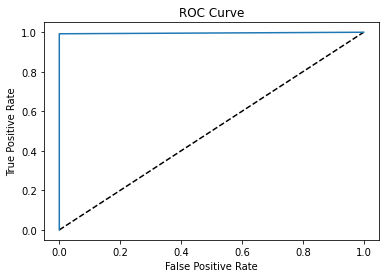

In [34]:
#訓練データROC曲線
fpr,tpr,thresholds = roc_curve(y_train,y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

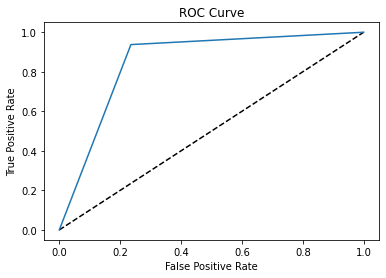

In [35]:
#テストデータROC曲線
fpr,tpr,thresholds = roc_curve(y_test,y_pred2)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [37]:
#AUC
print('AUC:{}'.format(roc_auc_score(y_train,y_pred)))
print('AUC:{}'.format(roc_auc_score(y_test,y_pred2)))

AUC:0.9961240310077519
AUC:0.8511029411764706


In [38]:
#precision(適合率)　訓練データ
from sklearn.metrics import precision_score
print(precision_score(y_train,y_pred,average='binary'))

1.0


In [39]:
#precision(適合率)　テストデータ
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred2,average='binary'))

0.8823529411764706


In [40]:
#recall.senstive(再現率)　訓練データ
from sklearn.metrics import recall_score
print(recall_score(y_train,y_pred,average='binary'))

0.9922480620155039


In [41]:
#recall.senstive(再現率)　テストデータ
from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred2,average='binary'))

0.9375


In [42]:
#F値　訓練データ
from sklearn.metrics import f1_score
print(f1_score(y_train,y_pred,average='binary'))

0.9961089494163424


In [43]:
#F値　テストデータ
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred2,average='binary'))

0.9090909090909091


In [44]:
#分類レポート
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       1.00      0.99      1.00       129

    accuracy                           0.99       197
   macro avg       0.99      1.00      0.99       197
weighted avg       0.99      0.99      0.99       197

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.88      0.94      0.91        32

    accuracy                           0.88        49
   macro avg       0.87      0.85      0.86        49
weighted avg       0.88      0.88      0.88        49



In [45]:
import joblib

In [46]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 21.1 MB/s 


In [47]:
import shap

In [48]:
explainer = shap.TreeExplainer(model=xgboost_model,data=X_train,feature_perturbation="interventional",)

In [49]:
shap_values = explainer(X_train)

In [50]:
shap_values[0]

.values =
array([ 0.53913504,  0.07520055,  0.05157212,  0.02256806, -0.25715758,
       -0.04026424,  0.38445247,  0.        ,  0.        , -0.14963254,
        0.03705205, -0.01751266, -0.00328644, -0.00930766,  0.05077023,
        0.01807956, -0.05204168,  0.        ,  0.        , -0.08592923,
       -0.01112906, -0.06500882, -0.00134044, -0.07049111, -0.02002528,
        0.63549272,  0.30342552,  0.00505478,  0.1696441 ,  0.20187274,
        0.29365675,  0.00348555,  0.00167729,  0.        ,  0.00611909,
        0.        ,  0.        ,  0.62502607, -0.04098304,  0.06554494,
        0.0568021 ,  0.14700867,  0.        ,  0.        ,  0.35641496,
        0.11879974,  0.15653832])

.base_values =
1.76131571610018

.data =
array([50.,  1.,  0.,  1.,  0.,  1.,  4.,  0.,  0.,  2.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  6.,  6.,  6.,
        6.,  6.,  6.,  4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 10.,
       10.,  0.,  5.,  0.,  0., 10., 10., 10.])

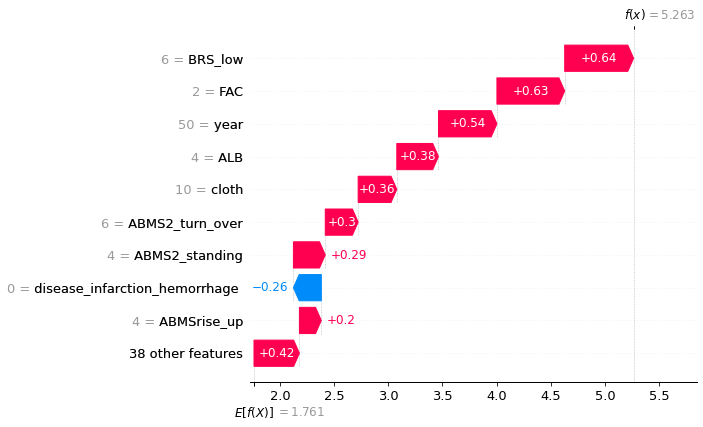

In [51]:
#　ある一症例のSHAP値①
shap.plots.waterfall(shap_values[0])

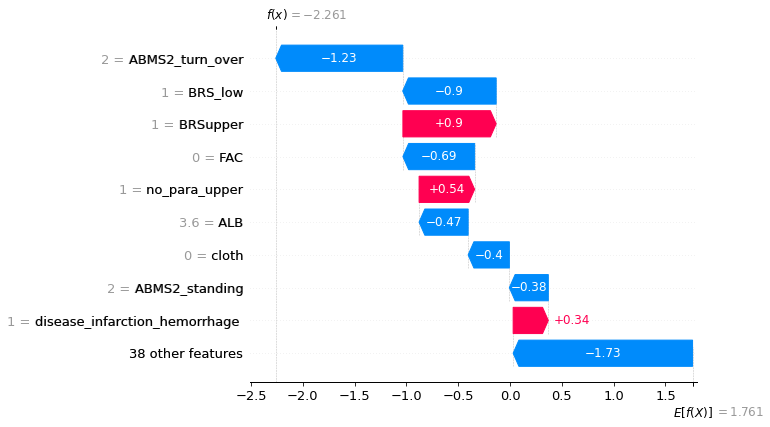

In [52]:
#　ある一症例のSHAP値②
shap.plots.waterfall(shap_values[1])

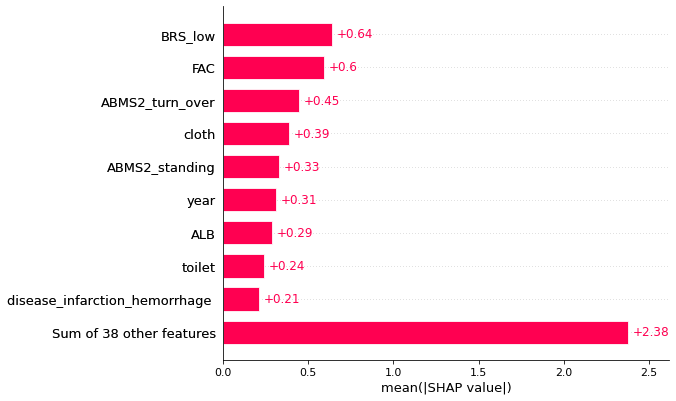

In [53]:
#学習データでのshap　全例
shap.plots.bar(shap_values=shap_values)

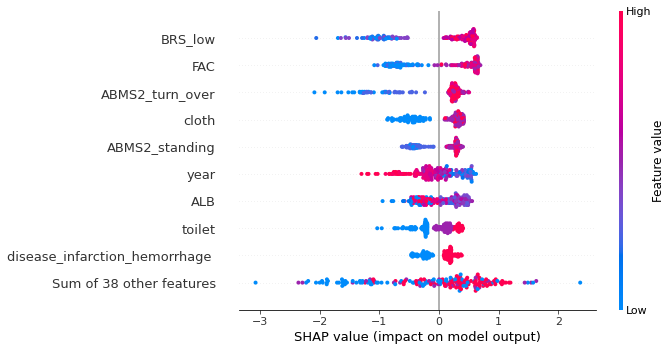

In [54]:
#訓練データ　SHAP値分布図
shap.plots.beeswarm(shap_values)

In [55]:
explainer2 = shap.TreeExplainer(model=xgboost_model,data=X_test,feature_perturbation="interventional",)

In [56]:
shap_values2 = explainer2(X_test)

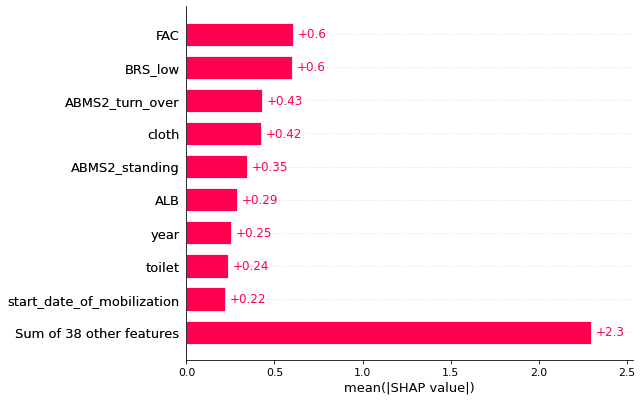

In [57]:
#テストデータでのshap値　全例
shap.plots.bar(shap_values=shap_values2)

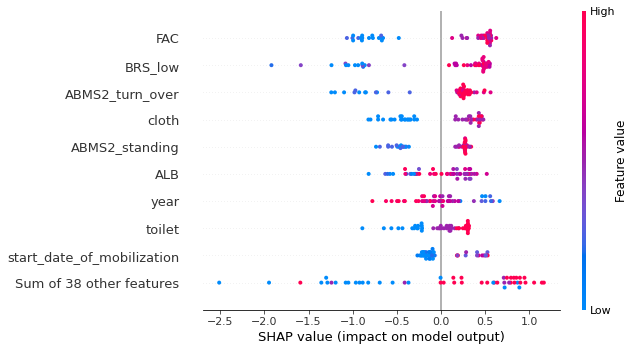

In [58]:
#テストデータ　SHAP値分布図
shap.plots.beeswarm(shap_values2)

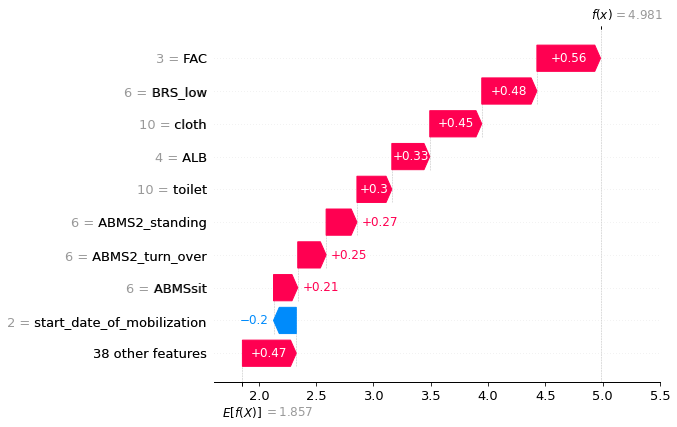

In [59]:
#テストデータのある1症例のSHAP値
shap.plots.waterfall(shap_values2[0])